# Backpropagation com PyTorch

### Importação de Bibliotecas Necessárias

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### Definição da Classe NeuralNet

A classe `NeuralNet` implementa uma rede neural simples de uma camada oculta com a função de ativação sigmoide. A rede é treinada utilizando o algoritmo de *backpropagation* para ajustar os pesos e *bias*. A seguir, é explicado cada parte dessa classe.

#### 1. **Método `__init__` (Inicialização)**

O método `__init__` inicializa os pesos (`w1`, `w2`, `w3`, `w4`) e os *bais* (`b1`, `b2`, `b3`) da rede com valores aleatórios gerados por uma distribuição normal. Além disso, é definida a taxa de aprendizado (`lr`), que controla a quantidade de ajuste feita nos pesos durante o treinamento.

- **Pesos**: `w1`, `w2`, `w3` e `w4` são valores aleatórios que vão ser ajustados durante o treinamento.
- **Bias**: `b1`, `b2` e `b3` são os valores de viés para cada camada da rede.
- **Taxa de aprendizado (`lr`)**: A taxa com que a rede vai aprender. Quanto menor for o valor, mais os pesos serão ajustados.

#### 2. **Método `sigmoid`**

A função `sigmoid` é a função de ativação utilizada na rede neural. Ela é uma função não linear e com ele mapea os valores de entrada para o intervalo entre 0 e 1. A fórmula é dada por:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

#### 3. **Método `sigmoid_derivative`**

Este método calcula a derivada da função *sigmoid*, que é necessária para o processo de *backpropagation*. A derivada é usada para ajustar os pesos de forma eficiente durante o treinamento, permitindo que a rede minimize o erro.

#### 4. **Método `forward`**

O método `forward` realiza a propagação para frente, ou seja, calcula a saída da rede com base nas entradas fornecidas. A rede possui três camadas:

- **Camada 1**: Calcula `z1 = w1 * X + b1` e aplica a função sigmoide para obter a ativação `a1`.
- **Camada 2**: Calcula `z2 = w2 * a1 + b2` e aplica a função sigmoide para obter a ativação `a2`.
- **Camada 3**: Calcula `z3 = w3 * a2 + b3` e aplica a função sigmoide para obter a saída final da rede.

#### 5. **Método `backward` (*backpropagation*)**

O método `backward` implementa o algoritmo de *backpropagation*, que ajusta os pesos da rede com base no erro entre a saída prevista e a saída real. O erro é propagado de volta, e os gradientes são calculados para cada peso e bais. Esses gradientes são usados para atualizar os parâmetros da rede de forma a minimizar o erro.

<img src="fig1.png" width="600" />

- **Cálculo dos gradientes**: Para cada camada, os gradientes são calculados com base na derivada da função de ativação sigmoide.
- **Atualização dos pesos e vieses**: Após calcular os gradientes, os pesos e vieses são atualizados de acordo com a taxa de aprendizado definida no início.

#### 6. **Método `train` (Treinamento)**

O método `train` é responsável pelo processo de treinamento da rede. Ele recebe as entradas (`X`), as saídas esperadas (`Y`) e o número de épocas (iterações) para o treinamento. Durante cada época, a rede realiza a propagação para frente e a *backpropagation* para ajustar os pesos.

- **Erro total**: O erro quadrático total é calculado para cada iteração e registrado para monitorar o desempenho da rede durante o treinamento.
- **Atualização dos pesos**: Após cada iteração, os pesos e vieses são ajustados, e o erro total é registrado.

In [32]:
class NeuralNet:
    def __init__(self):
        self.w1, self.w2, self.w3, self.w4 = np.random.randn(4)
        self.b1, self.b2, self.b3 = np.random.randn(3)
        self.lr = 0.01 # Taxa de aprendizado

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def sigmoid_derivative(self, X):
        return X * (1 - X)

    def forward(self, X):
        self.z1 = self.w1 * X + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = self.w2 * self.a1 + self.b2
        self.a2 = self.sigmoid(self.z2)

        self.z3 = self.w3 * self.a2 + self.b3
        self.output = self.sigmoid(self.z3)

        return self.output

    def backward(self, X, y):
        error = y - self.output
        d_output = error * self.sigmoid_derivative(self.output)

        d_z2 = d_output * self.w3 * self.sigmoid_derivative(self.a2)
        d_w3 = self.a2 * d_output
        d_b3 = d_output
        
        d_z1 = d_z2 * self.w2 * self.sigmoid_derivative(self.a1)
        d_w2 = self.a1 * d_z2
        d_b2 = d_z2
        
        d_w1 = X * d_z1
        d_b1 = d_z1
        
        # Atualiza os pesos
        self.w1 += self.lr * d_w1
        self.w2 += self.lr * d_w2
        self.w3 += self.lr * d_w3
        self.b1 += self.lr * d_b1
        self.b2 += self.lr * d_b2
        self.b3 += self.lr * d_b3

    def train(self, X, Y, epochs=1000):
        errors = []
        for _ in range(epochs):
            total_error = 0
            for x, y in zip(X, Y):
                self.forward(x)
                total_error += (y - self.output) ** 2
                self.backward(x, y)
            errors.append(total_error / len(X))
        return errors

Dados de entrada (pequeno exemplo)

### Definição dos Dados de Entrada e Saída

Neste trecho de código, é usado os dados de entrada (`X`) e os dados de saída esperados (`Y`) para treinar a rede neural.

- **Entrada (`X`)**: Os valores de entrada que serão fornecidos à rede neural durante o treinamento. 
  
- **Saída Esperada (`Y`)**: Os valores desejados (ou verdadeiros) para cada entrada correspondente. 

In [33]:
X = np.array([0,1,2,3])
Y = np.array([0,1,1,0])

### Criação e Treinamento do Modelo

Neste trecho de código, é criado e treinado o modelo de rede neural definido anteriormente.

- **Criação do Modelo (`nn_model`)**: A variável `nn_model` é uma instância da classe `NeuralNet`, que representa a rede neural. Ao criar essa instância, os pesos e *bias* da rede são inicializados, e a taxa de aprendizado é definida.

- **Treinamento do Modelo (`errors_model`)**: A variável `errors_model` armazena o resultado do método `train`, que treina a rede neural utilizando os dados de entrada (`X`) e as saídas esperadas (`Y`).

In [34]:
nn_model = NeuralNet()
errors_model = nn_model.train(X, Y)

## Implementação no PyTorch

### Definição da Classe NeuralNetTorch com PyTorch

Neste trecho de código, é definido uma rede neural utilizando a biblioteca **PyTorch**, que oferece uma implementação mais poderosa e flexível para redes neurais. A classe `NeuralNetTorch` herda de `nn.Module`, que é a classe base.

#### 1. **Método `__init__`**

O método `__init__` define as camadas da rede neural.

- **`super(NeuralNetTorch, self).__init__()`**: Este comando chama o inicializador da classe base `nn.Module`, permitindo que a classe `NeuralNetTorch` herde todos os métodos e propriedades da classe `nn.Module`.
  
- **`self.dense1 = nn.Linear(1, 3)`**: Define a primeira camada densa da rede neural.
  
- **`self.dense2 = nn.Linear(3, 1)`**: Define a segunda camada densa da rede, que recebe uma entrada de dimensão 3 e gera uma saída de dimensão 1.

- **`self.sigmoid = nn.Sigmoid()`**: Define a função de ativação *sigmoid*, que será aplicada após cada camada densa.

#### 2. **Método `forward`**

O método `forward` define como os dados fluem através da rede neural durante a inferência. Ele especifica a ordem das operações e a passagem dos dados através das camadas.

- **`X = self.sigmoid(self.dense1(X))`**: Os dados de entrada `X` passam pela primeira camada densa `dense1` e, em seguida, são ativados pela função sigmoide.
  
- **`X = self.sigmoid(self.dense2(X))`**: A saída da primeira camada é passada pela segunda camada densa `dense2`, e novamente é ativada pela função sigmoide.

- **Retorno**: A saída final da rede é retornada após a segunda camada.

In [35]:
class NeuralNetTorch(nn.Module):
    def __init__(self):
        super(NeuralNetTorch, self).__init__()
        self.dense1 = nn.Linear(1, 3)
        self.dense2 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = self.sigmoid(self.dense1(X))
        X = self.sigmoid(self.dense2(X))
        return X

### Definição do Modelo, Função de Perda e Otimizador

Neste trecho de código, é preparado o modelo para treinamento utilizando **PyTorch**, definindo a função de perda e o otimizador.

#### 1. **Criação do Modelo (`model`)**

- **`model = NeuralNetTorch()`**: Aqui, é criado uma instância da classe `NeuralNetTorch`, que define a arquitetura da rede neural. O modelo contém duas camadas densas e usa a função *sigmoid* como ativação.

#### 2. **Função de Perda (`criterion`)**

- **`criterion = nn.MSELoss()`**: A função de perda que a ser utilizado é a **MSELoss** (*Mean Squared Error Loss*). O objetivo do treinamento é minimizar essa função de perda, ou seja, reduzir a diferença entre a saída da rede e os valores reais.

#### 3. **Otimizador (`optimizer`)**

- **`optimizer = optim.SGD(model.parameters(), lr=0.01)`**: O otimizador que estamos utilizando é o **SGD (Stochastic Gradient Descent)**. Ele ajusta os pesos do modelo para minimizar a função de perda. Quanto menor for a taxa de aprendizado, mais lentamente o modelo aprenderá.

In [36]:
model = NeuralNetTorch()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Preparando os dados

### Conversão dos Dados para Tensores

Neste trecho de código, estamos convertendo os dados de entrada (`X`) e as saídas esperadas (`Y`) em tensores do PyTorch. Isso é necessário porque o PyTorch trabalha com tensores para realizar cálculos e treinamentos de redes neurais.

#### 1. **Conversão de `X` para Tensor (`X_torch`)**

- **`X_torch = torch.tensor(X, dtype=torch.float32).view(-1, 1)`**: A variável `X` é convertida em um tensor do PyTorch com o tipo de dado `float32`, que é o formato esperado para os dados de entrada na rede neural. O método `view(-1, 1)` reorganiza os dados para que cada valor de `X` seja representado como uma matriz coluna, com dimensão `(n, 1)`, onde `n` é o número de exemplos de entrada.

#### 2. **Conversão de `Y` para Tensor (`Y_torch`)**

- **`Y_torch = torch.tensor(Y, dtype=torch.float32).view(-1, 1)`**: De maneira similar, os dados de saída `Y` são convertidos em um tensor `float32` e reorganizados para ter a forma de uma matriz coluna `(n, 1)`, onde cada valor de `Y` será mapeado para uma saída esperada correspondente.

Esses tensores serão usados como entrada e saída durante o treinamento do modelo de rede neural no PyTorch.


In [37]:
X_torch = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y_torch = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

### Treinamento da Rede no PyTorch

Neste trecho de código, estamos treinando o modelo de rede neural utilizando o PyTorch. O processo de treinamento envolve a propagação dos dados para frente, cálculo da perda, retropropagação do erro e atualização dos pesos do modelo.

#### 1. **Inicialização da Lista de Erros (`torch_errors`)**

- **`torch_errors = []`**: Inicializamos uma lista vazia `torch_errors` para armazenar o erro (função de perda) de cada época do treinamento. Isso nos permite monitorar o desempenho do modelo ao longo do tempo.

#### 2. **Loop de Treinamento**

- **`for epoch in range(1000):`**: O loop de treinamento irá iterar por 1000 épocas (iterações), onde o modelo será ajustado progressivamente. Em cada época, o modelo realizará as operações de propagação para frente, cálculo da perda, retropropagação e atualização dos pesos.

#### 3. **Propagação para Frente**

- **`optimizer.zero_grad()`**: Antes de calcular os gradientes, é necessário zerar os gradientes acumulados das iterações anteriores, já que o PyTorch acumula os gradientes por padrão.

- **`output = model(X_torch)`**: Os dados de entrada `X_torch` são passados pela rede neural (`model`) para gerar a saída `output`. Isso realiza a propagação para frente, onde os dados fluem através das camadas da rede.

#### 4. **Cálculo da Perda**

- **`loss = criterion(output, Y_torch)`**: A função de perda (`criterion`) calcula o erro entre a saída predita `output` e as saídas reais `Y_torch`. Nesse caso, estamos utilizando a **MSELoss** (Erro Quadrático Médio), que calcula a média das diferenças ao quadrado entre as saídas preditas e reais.

#### 5. **Retropropagação e Atualização dos Pesos**

- **`loss.backward()`**: A retropropagação do erro é realizada, calculando os gradientes dos pesos da rede com base na perda calculada. Esse processo ajusta os gradientes para minimizar o erro.

- **`optimizer.step()`**: Após o cálculo dos gradientes, o otimizador (SGD) atualiza os p


In [38]:
# Treinamento da rede no PyTorch
torch_errors = []
for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X_torch)
    loss = criterion(output, Y_torch)
    loss.backward()
    optimizer.step()
    torch_errors.append(loss.item())

print("Treinamento concluído!")

Treinamento concluído!


### Plotando a Curva de Erro

Neste trecho de código, estamos visualizando o desempenho do treinamento das duas redes neurais, uma implementada manualmente (com backpropagação) e outra utilizando o PyTorch, ao longo das 1000 épocas.

#### 1. **Plotando os Erros**

- **`plt.plot(errors_model, label='Erro - Backprop Manual')`**: Este comando plota a curva de erro da rede neural implementada manualmente, onde `errors_model` contém os erros médios calculados a cada época. O rótulo `'Erro - Backprop Manual'` será usado na legenda para identificar essa curva.

- **`plt.plot(torch_errors, label='Erro - PyTorch')`**: Da mesma forma, este comando plota a curva de erro da rede neural treinada utilizando o PyTorch, com os valores armazenados na lista `torch_errors`. O rótulo `'Erro - PyTorch'` será usado na legenda para identificar essa curva.

#### 2. **Configuração dos Eixos**

- **`plt.xlabel('Épocas')`**: Define o rótulo do eixo x como "Épocas", representando o número de iterações de treinamento.

- **`plt.ylabel('Erro')`**: Define o rótulo do eixo y como "Erro", representando o valor da função de perda em cada época.

#### 3. **Legenda**

- **`plt.legend()`**: Exibe a legenda no gráfico, ajudando a identificar as duas curvas, uma para o erro da rede manual e outra para o erro da rede PyTorch.

#### 4. **Exibindo o Gráfico**

- **`plt.show()`**: Exibe o gráfico na tela, permitindo visualizar as curvas de erro durante o treinamento de ambas as redes.

O gráfico gerado permite comparar como o erro evolui durante o treinamento de ambas as redes, ajudando a visualizar a eficiência do modelo e o progresso do aprendizado.


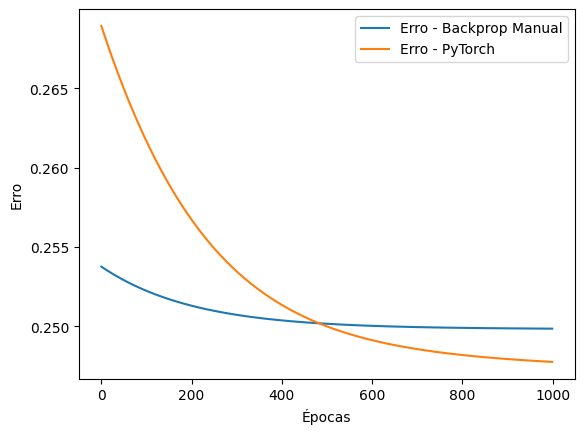

In [39]:
# Plotando a curva de erro
plt.plot(errors_model, label='Erro - Backprop Manual')
plt.plot(torch_errors, label='Erro - PyTorch')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.show()